## Importing Data

In [8]:
import csv
import numpy 
wifis_list = []
with open('wifi_train.txt', newline = '') as wifis:                                                                                          
    	wifi_reader = csv.reader(wifis, delimiter='\t')
    	for wifi in wifi_reader:
    		#print(wifi)
            wifis_list.append([int(item) for item in wifi])
wifis_dt = numpy.array([numpy.array(row) for row in wifis_list])      
numpy.shape(wifis_dt)

(1900, 8)

### Split test and train data randomly

In [18]:
from sklearn.model_selection import train_test_split


wifis_dt1 = wifis_dt[numpy.where(wifis_dt[:,7]==1)]
wifis_dt3 = wifis_dt[numpy.where(wifis_dt[:,7]==3)]
wifis_dt1_3 = numpy.concatenate((wifis_dt1, wifis_dt3))
print('Length of dataset to be trained: ', len(wifis_dt1_3))
X = wifis_dt1_3[:,0:7]
y =  wifis_dt1_3[:,7].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


Length of dataset to be trained:  900


## Supprt Vector Machine Classifier (SVM)

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

print('\n** SVC Results **')


model_svm = SVC(kernel='linear', C=1)
model_svm.fit(X_train, y_train)



** SVC Results **


SVC(C=1, kernel='linear')

Predicting Trained model on test data

In [54]:
y_pred = model_svm.predict(X_test)

## Confusion Matrix and Accuracy 


** Decision Tree Results **
Train Accuracy: 1.0
Test Accuracy: 0.9851851851851852
Test fscore: 0.9857142857142858


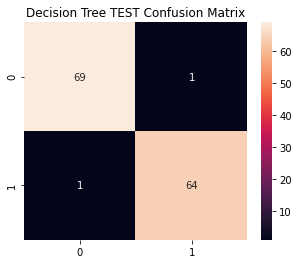

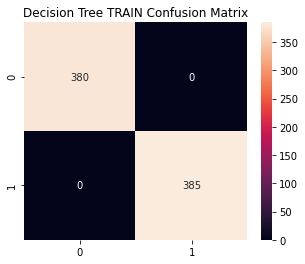

In [55]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

def plot_conf_mat(y_pred, y_test):
    '''
    This function take true and predicted labels and plot the confusion matrix. 
    '''
    n = 2
    cm = np.zeros((n,n))
    for i in range (len(y_pred)):
        cm[int((y_test[i]-1)/2),int( (y_pred[i]-1)/2)] += 1  
        
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    df_cm = pd.DataFrame(cm).astype("float")
    sn.heatmap(df_cm, annot=True, fmt = 'g' )
    plt.title('SVM TEST Confusion Matrix')
    # todo: Put your code here

def plot_conf_mat_train(y_pred, y_test):
    '''
    This function take true and predicted labels for train set and plot the confusion matrix. 
    '''
    n = 2
    cm = np.zeros((n,n))
    for i in range (len(y_pred)):
        cm[int((y_test[i]-1)/2),int( (y_pred[i]-1)/2)] += 1  
        
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    df_cm = pd.DataFrame(cm).astype("float")
    sn.heatmap(df_cm, annot=True, fmt = 'g' )
    plt.title('SVM TRAIN Confusion Matrix')
    # todo: Put your code here

plot_conf_mat(y_pred, y_test)

y_pred_train = model_svm.predict(X_train)
plot_conf_mat_train(y_pred_train, y_train)
print('\n** Decision Tree Results **')


print('Train Accuracy: ' + str(accuracy_score(y_train, y_pred_train)) )
print('Test Accuracy: ' + str(accuracy_score(y_test, y_pred)) )
print('Test fscore: ' + str(f1_score(y_test, y_pred)) )
#print('Test confusion: \n' + str(confusion_matrix(y_test, classifier.predict(X_test))) )

# Logistic Regression 

In [69]:
from sklearn.linear_model import LogisticRegression
print('** LogisticRegression Results **')
max_iter = 1000
model_lr = LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = max_iter)
model_lr.fit(X_train, y_train)

** LogisticRegression Results **


LogisticRegression(max_iter=1000, multi_class='multinomial')


** Logisitic Regression Results **
Train Accuracy: 0.9973856209150327
Test Accuracy: 1.0
Test fscore: 1.0


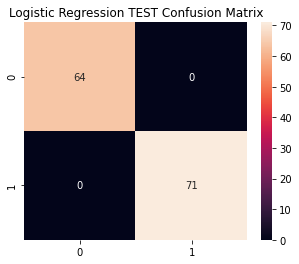

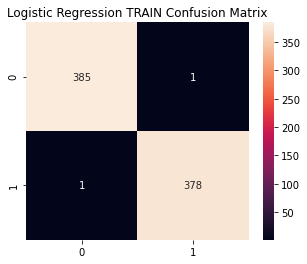

In [72]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
def plot_conf_mat(y_pred, y_test):
    '''
    This function take true and predicted labels and plot the confusion matrix. 
    '''
    n = 2
    cm = np.zeros((n,n))
    for i in range (len(y_pred)):
        cm[int((y_test[i]-1)/2),int( (y_pred[i]-1)/2)] += 1  
        
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    df_cm = pd.DataFrame(cm).astype("float")
    sn.heatmap(df_cm, annot=True, fmt = 'g' )
    plt.title('Logistic Regression TEST Confusion Matrix')
    # todo: Put your code here

def plot_conf_mat_train(y_pred, y_test):
    '''
    This function take true and predicted labels for train set and plot the confusion matrix. 
    '''
    n = 2
    cm = np.zeros((n,n))
    for i in range (len(y_pred)):
        cm[int((y_test[i]-1)/2),int( (y_pred[i]-1)/2)] += 1  
        
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    df_cm = pd.DataFrame(cm).astype("float")
    sn.heatmap(df_cm, annot=True, fmt = 'g' )
    plt.title('Logistic Regression TRAIN Confusion Matrix')
    # todo: Put your code here

y_pred = model_lr.predict(X_test)
plot_conf_mat(y_pred, y_test)

y_pred_train = model_svm.predict(X_train)
plot_conf_mat_train(y_pred_train, y_train)
print('\n** Logisitic Regression Results **')


print('Train Accuracy: ' + str(accuracy_score(y_train, y_pred_train)) )
print('Test Accuracy: ' + str(accuracy_score(y_test, y_pred)) )
print('Test fscore: ' + str(f1_score(y_test, y_pred)) )
#print('Test confusion: \n' + str(confusion_matrix(y_test, classifier.predict(X_test))) )